In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [2]:
alt.renderers.enable('notebook')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/all_energy_statistics.csv')
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [10]:
df.drop('quantity_footnotes', axis=1, inplace=True)

In [11]:
print(df['category'].value_counts())

total_electricity                                              133916
gas_oil_diesel_oil                                              97645
fuel_oil                                                        75132
natural_gas_including_lng                                       64161
liquified_petroleum_gas                                         62156
motor_gasoline                                                  53198
fuelwood                                                        52032
electricity_net_installed_capacity_of_electric_power_plants     50229
other_kerosene                                                  43466
hard_coal                                                       42307
kerosene_type_jet_fuel                                          34558
heat                                                            29656
charcoal                                                        28000
conventional_crude_oil                                          27352
other_bituminous_coa

In [12]:
US = df[df['country_or_area']=='United States'].sort_values('year')
print('US :%f', US.shape)
BR= df[df['country_or_area']=='Brazil'].sort_values('year')
print('BR: %f', BR.shape)
CAN = df[df['country_or_area']=='Canada'].sort_values('year')
print('CAN: %f', CAN.shape)
CHI = df[df['country_or_area']=='China'].sort_values('year')
print('CHI: %f', CHI.shape)
IND = df[df['country_or_area']=='India'].sort_values('year')
print('IND: %f', IND.shape)
JAP = df[df['country_or_area']=='Japan'].sort_values('year')
print('JAP: %f', JAP.shape)
UK =df[df['country_or_area']=='United Kingdom'].sort_values('year')
print('UK: %f', UK.shape)

#List of countries to make the European Union.
SP = df[df['country_or_area']=='Spain'].sort_values('year')
print('SP: %f', SP.shape)
ITA = df[df['country_or_area']=='Italy'].sort_values('year')
print('ITA: %f', ITA.shape)
GER = df[df['country_or_area']=='Germany'].sort_values('year')
print('GER: %f', GER.shape)
FRA = df[df['country_or_area']=='France'].sort_values('year')
print('FRA: %f', FRA.shape)
NETH = df[df['country_or_area']=='Netherlands'].sort_values('year')
print('NETH: %f', NETH.shape)

US :%f (19847, 6)
BR: %f (10374, 6)
CAN: %f (15453, 6)
CHI: %f (11563, 6)
IND: %f (7775, 6)
JAP: %f (17037, 6)
UK: %f (15536, 6)
SP: %f (15815, 6)
ITA: %f (16312, 6)
GER: %f (20422, 6)
FRA: %f (17236, 6)
NETH: %f (15955, 6)


In [21]:
IND_WIND = IND[IND['commodity_transaction'] == "Electricity - total wind production"]

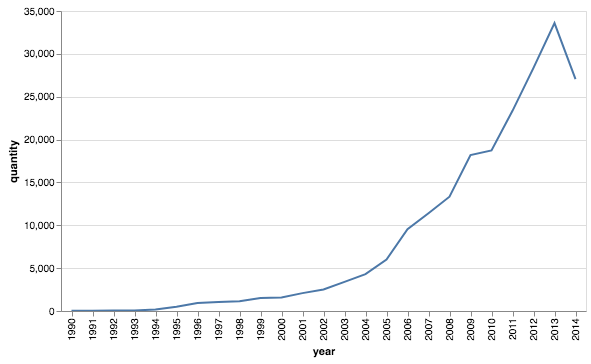

In [35]:
alt.Chart(IND_WIND).mark_line().encode(
    alt.X('year:N'),
    alt.Y('quantity:Q'),
)

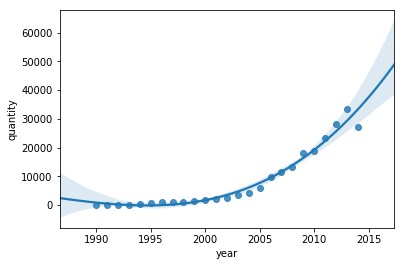

In [32]:
sns.regplot(IND_WIND['year'], IND_WIND['quantity'], order=3)

In [36]:
IND_WIND

,country_or_area,commodity_transaction,year,unit,quantity,category
1188665,India,Electricity - total wind production,1990,"Kilowatt-hours, million",32.0,wind_electricity
1188664,India,Electricity - total wind production,1991,"Kilowatt-hours, million",39.0,wind_electricity
1188663,India,Electricity - total wind production,1992,"Kilowatt-hours, million",52.0,wind_electricity
1188662,India,Electricity - total wind production,1993,"Kilowatt-hours, million",57.0,wind_electricity
1188661,India,Electricity - total wind production,1994,"Kilowatt-hours, million",182.0,wind_electricity
1188660,India,Electricity - total wind production,1995,"Kilowatt-hours, million",498.0,wind_electricity
1188659,India,Electricity - total wind production,1996,"Kilowatt-hours, million",926.0,wind_electricity
1188658,India,Electricity - total wind production,1997,"Kilowatt-hours, million",1037.0,wind_electricity
1188657,India,Electricity - total wind production,1998,"Kilowatt-hours, million",1127.0,wind_electricity
1188656,India,Electricity - total wind production,1999,"Kilowatt-hours, million",1509.0,wind_electricity
